# 23 — Network Graphs (Layouts, Styling, Communities)

## Overview
Network graphs visualize entities (nodes) and relationships (edges). Matplotlib + NetworkX is the common Python approach.

### What you'll learn
- Build graphs (undirected/directed/weighted)
- Layouts: spring, circular, shell, spectral
- Styling: node size/color by degree, edge width by weight
- Community-like coloring (simple clustering demo)

> If NetworkX isn't installed: `pip install networkx`


In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
np.random.seed(42)

try:
    import networkx as nx
    print('✅ NetworkX available:', nx.__version__)
except Exception as e:
    nx = None
    print('⚠️ NetworkX not available. Install via: pip install networkx')
    print('Error:', e)

✅ NetworkX available: 3.4.2


## 1. Basic Graph + Layouts
We'll create a small weighted graph and visualize it with different layouts.


=== GRAPH LAYOUTS ===


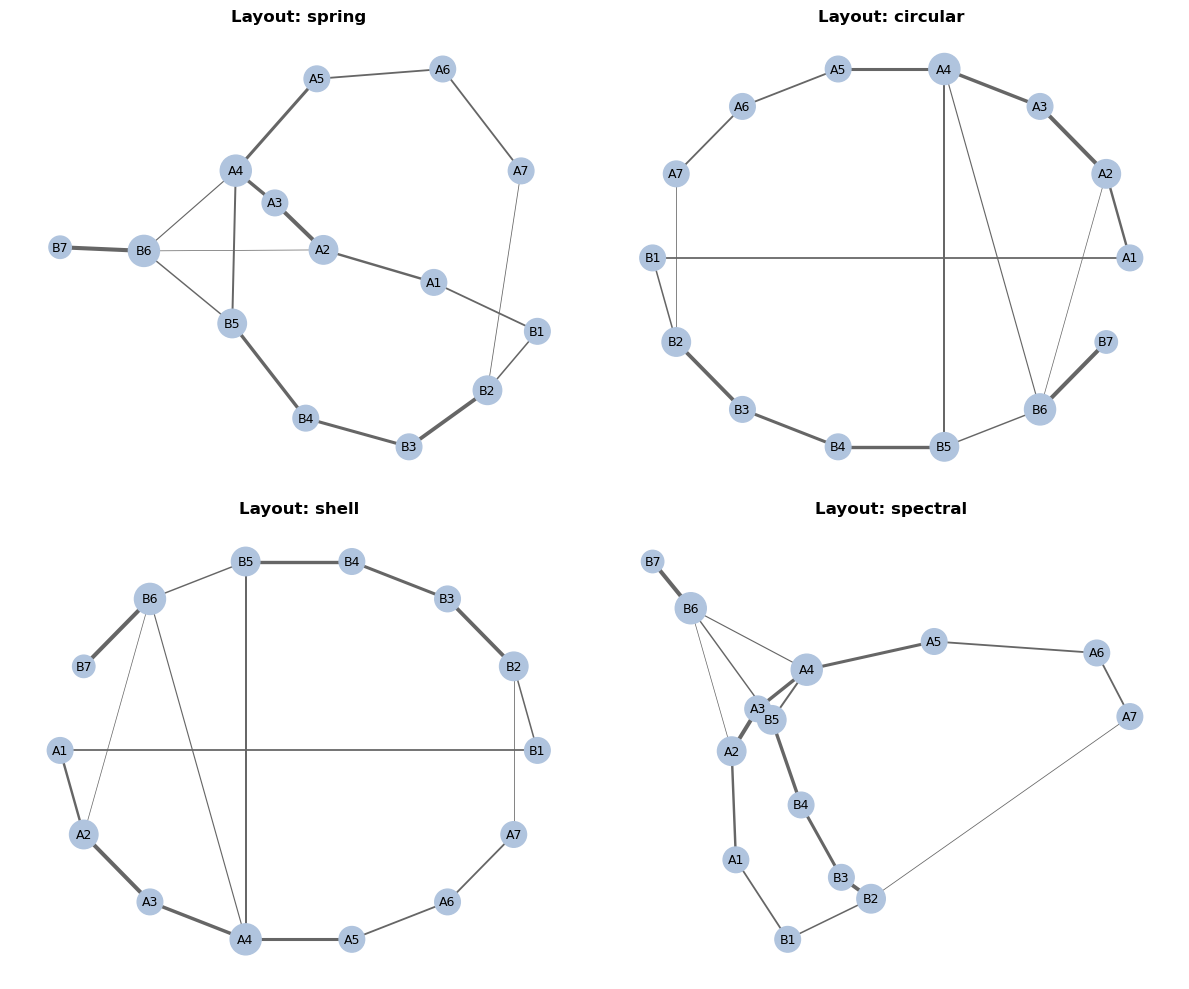

In [2]:
if nx is not None:
    print('=== GRAPH LAYOUTS ===')
    G = nx.Graph()
    # Two clusters with some cross edges
    cluster1 = [f'A{i}' for i in range(1, 8)]
    cluster2 = [f'B{i}' for i in range(1, 8)]
    G.add_nodes_from(cluster1 + cluster2)
    for i in range(len(cluster1)-1):
        G.add_edge(cluster1[i], cluster1[i+1], weight=np.random.uniform(1, 3))
    for i in range(len(cluster2)-1):
        G.add_edge(cluster2[i], cluster2[i+1], weight=np.random.uniform(1, 3))
    # cross edges
    for _ in range(5):
        G.add_edge(np.random.choice(cluster1), np.random.choice(cluster2), weight=np.random.uniform(0.5, 2))

    layouts = {
        'spring': nx.spring_layout(G, seed=42),
        'circular': nx.circular_layout(G),
        'shell': nx.shell_layout(G),
        'spectral': nx.spectral_layout(G),
    }

    deg = dict(G.degree())
    node_sizes = [180 + 80*deg[n] for n in G.nodes()]
    edge_w = [G[u][v]['weight'] for u, v in G.edges()]

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.ravel()
    for ax, (name, pos) in zip(axes, layouts.items()):
        nx.draw_networkx(
            G, pos=pos, ax=ax, with_labels=True,
            node_size=node_sizes, node_color='lightsteelblue',
            edge_color='0.4', width=edge_w,
            font_size=9
        )
        ax.set_title(f'Layout: {name}', fontweight='bold')
        ax.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print('Skipping plots because NetworkX is not installed.')

## 2. Styling by Degree + Simple Community Coloring
A quick heuristic: color nodes by which cluster they belong to, and scale size by degree.


=== DEGREE SIZE + COMMUNITY COLOR (DEMO) ===


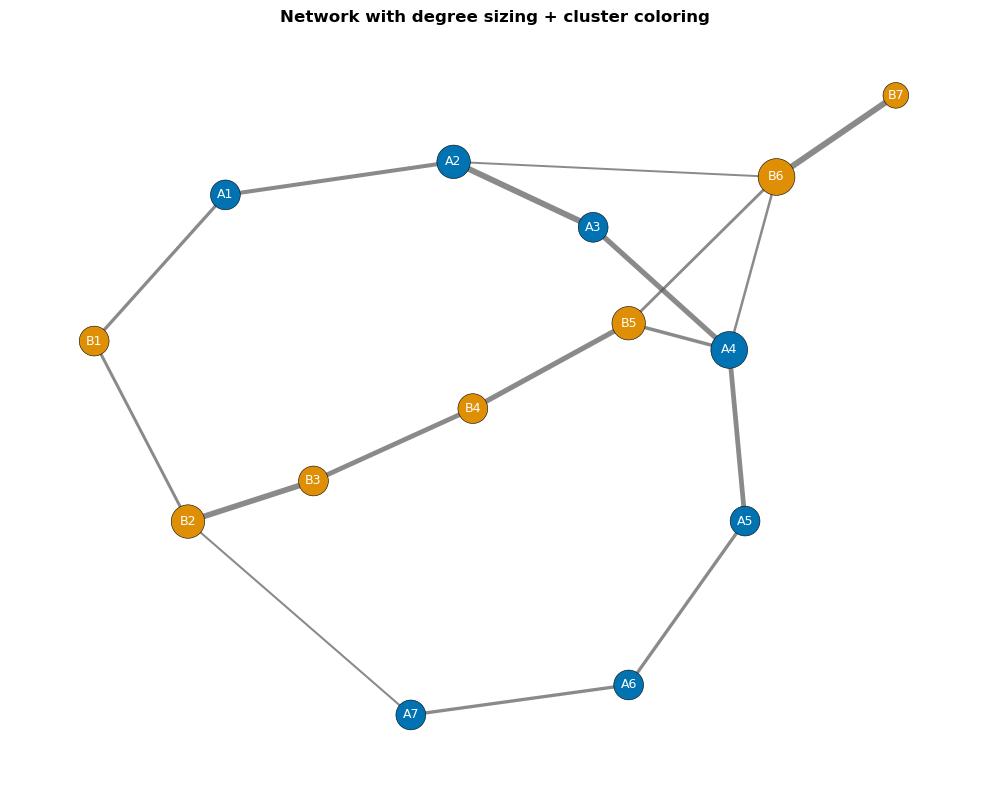

In [3]:
if nx is not None:
    print('=== DEGREE SIZE + COMMUNITY COLOR (DEMO) ===')
    pos = nx.spring_layout(G, seed=7)
    colors = ['#0173B2' if n.startswith('A') else '#DE8F05' for n in G.nodes()]
    sizes = [220 + 120*deg[n] for n in G.nodes()]
    widths = [0.8 + 1.2*G[u][v]['weight'] for u, v in G.edges()]

    fig, ax = plt.subplots(figsize=(10, 8))
    nx.draw_networkx_edges(G, pos, ax=ax, width=widths, edge_color='0.35', alpha=0.7)
    nx.draw_networkx_nodes(G, pos, ax=ax, node_color=colors, node_size=sizes, edgecolors='black', linewidths=0.4)
    nx.draw_networkx_labels(G, pos, ax=ax, font_size=9, font_color='white')
    ax.set_title('Network with degree sizing + cluster coloring', fontweight='bold')
    ax.axis('off')
    plt.tight_layout()
    plt.show()

## Practice + Quick Reference
### Practice
1. Build a directed graph (DiGraph) and plot arrows.
2. Color nodes by betweenness centrality.
3. Use `spring_layout` with different `k` values and compare spacing.

### Quick reference
```python
import networkx as nx
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx(G, pos=pos)
```
